# Formatting labels as polygonal segments
We consider the data exported from PlainSight in COCO format, reformat this into YOLOv5 format and plot the resulting bounding boxes as a sanity check. We also combine the seperate exports from Pete and Thomas.

In [1]:
import os
import sys

# Root directory
root_dir = '/Users/Holmes/Research/Projects/vespai'
os.chdir(root_dir)  # Move to root_dir
sys.path.insert(0, root_dir)

# Data directory (make new directory as copy from raw data)
data_dir = os.path.join(root_dir, 'datasets/data-21')
os.listdir(data_dir)

# Automatically reload imported programmes
%load_ext autoreload
%autoreload 2

## Create YOLOv5 annotations from JSON files
This first function reads the json_file in the list and extracts the annotations attached to each image file. The output is a list of dictionaries, one for each image.

Next it creates a temporary directory ann in which to store the YOLOv5 formatted annotations. We optionally expand the box sides by a proportion of the tight-fitting length; this helps include the legs.

In [2]:
from formatting.polygons import yolov5_polygons_from_json

json_files = []
for dataset in ['train', 'validation', 'test']:
    for ii in range(5):
        json_files.append(dataset + '-set-{:02d}.json'.format(ii + 1))
dict_list = yolov5_polygons_from_json(data_dir, json_files)

['train-set-01.json', 'train-set-02.json', 'train-set-03.json', 'train-set-04.json', 'train-set-05.json', 'validation-set-01.json', 'validation-set-02.json', 'validation-set-03.json', 'validation-set-04.json', 'validation-set-05.json', 'test-set-01.json', 'test-set-02.json', 'test-set-03.json', 'test-set-04.json', 'test-set-05.json']
/Users/Holmes/Research/Projects/vespai/datasets/data-21/train-set-01.json
/Users/Holmes/Research/Projects/vespai/datasets/data-21/train-set-02.json
/Users/Holmes/Research/Projects/vespai/datasets/data-21/train-set-03.json
/Users/Holmes/Research/Projects/vespai/datasets/data-21/train-set-04.json
/Users/Holmes/Research/Projects/vespai/datasets/data-21/train-set-05.json
/Users/Holmes/Research/Projects/vespai/datasets/data-21/validation-set-01.json
/Users/Holmes/Research/Projects/vespai/datasets/data-21/validation-set-02.json
/Users/Holmes/Research/Projects/vespai/datasets/data-21/validation-set-03.json
/Users/Holmes/Research/Projects/vespai/datasets/data-21/v

In [3]:
dict_list[0]

{'instances': [{'class': 0,
   'coords': [[1135.8277450854985, 608.0852056184405],
    [1129.7479906125877, 612.6450214731235],
    [1129.2413444065116, 619.8647299097051],
    [1126.8216787527733, 625.0260670889568],
    [1115.03528419855, 630.1826147064296],
    [1109.3524479473006, 635.9980740859439],
    [1104.2859858865415, 639.2912744254372],
    [1085.6667378132522, 645.3710288983481],
    [1072.4939364552788, 649.5508600984742],
    [1058.3078426851537, 655.630614571385],
    [1042.6018102968007, 662.3436768018906],
    [1023.8392857142857, 675.5044642857142],
    [1021.53015767629, 680.4426754884047],
    [1020.5514326039522, 686.3150259224324],
    [1023.8392857142857, 691.46875],
    [1028.3812331826557, 691.6436402051612],
    [1028.5987276431752, 699.2559463233453],
    [1031.8611445509684, 704.149571685035],
    [1039.147208978373, 710.1306693493224],
    [1047.8469873991546, 712.5231084150374],
    [1067.203994385394, 706.7595052112695],
    [1084.277309536178, 702.73585

## Split into data subsets
Next we split the image and annotation files into an 80:10:10 split: `train`, `val` and `test` as subdirectories of the new folders `images` and `labels`.

In [4]:
from formatting.boxes import split_train_val_test

split_train_val_test(data_dir)

Optionally, store locations of the `train`, `val` and `test` files in a locally pointing YAML for the model to read. 

In [5]:
from formatting.boxes import write_yaml

yaml_name = 'config-local.yaml'
write_yaml(data_dir, yaml_name)

## Plot example annotated images
Vespa crabro is segmented in *yellow*;
Vespa velutina in *red*.

File name: /Users/Holmes/Research/Projects/vespai/datasets/data-21/labels/train/01G2Z2MVA1S5WSV53C6FBTK97K.txt
Vespa crabro (yellow) count:  0
Vespa velutina (red) count:  1


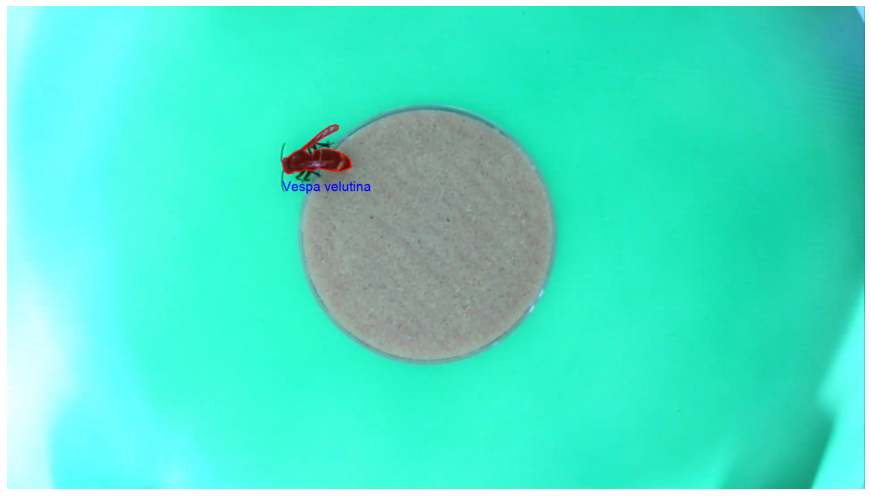

File name: /Users/Holmes/Research/Projects/vespai/datasets/data-21/labels/train/01FTXK6V9J3BNH5YJC0S9BZSJP.txt
Vespa crabro (yellow) count:  0
Vespa velutina (red) count:  1


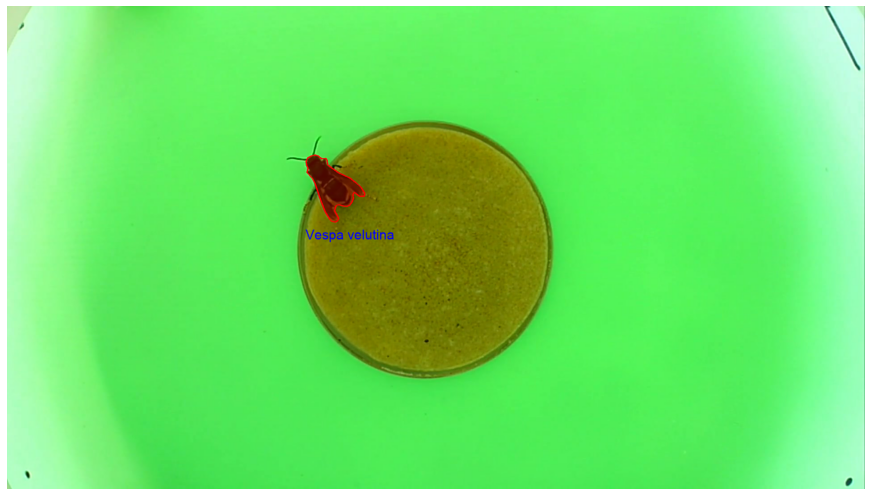

File name: /Users/Holmes/Research/Projects/vespai/datasets/data-21/labels/train/01FVAGPV8SRYGKGSMT0TER3XTZ.txt
Vespa crabro (yellow) count:  0
Vespa velutina (red) count:  1


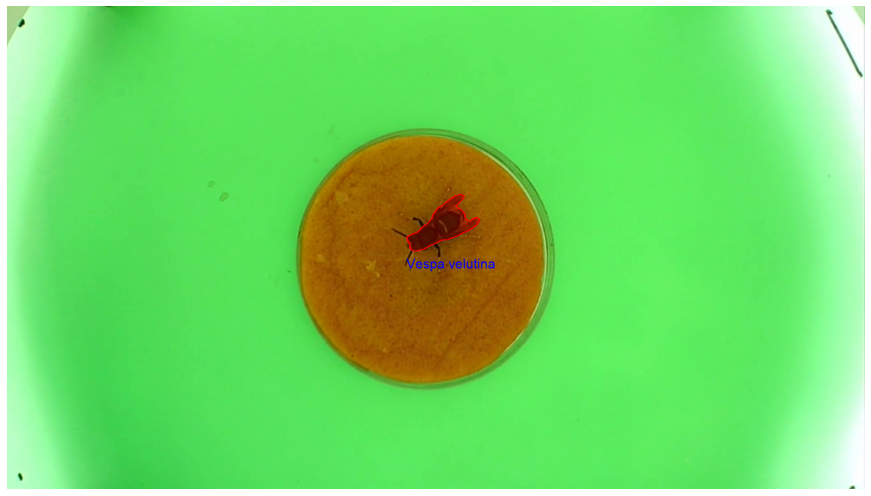

File name: /Users/Holmes/Research/Projects/vespai/datasets/data-21/labels/train/01FV86TKY3F60A22TM4NYVG3XR.txt
Vespa crabro (yellow) count:  0
Vespa velutina (red) count:  1


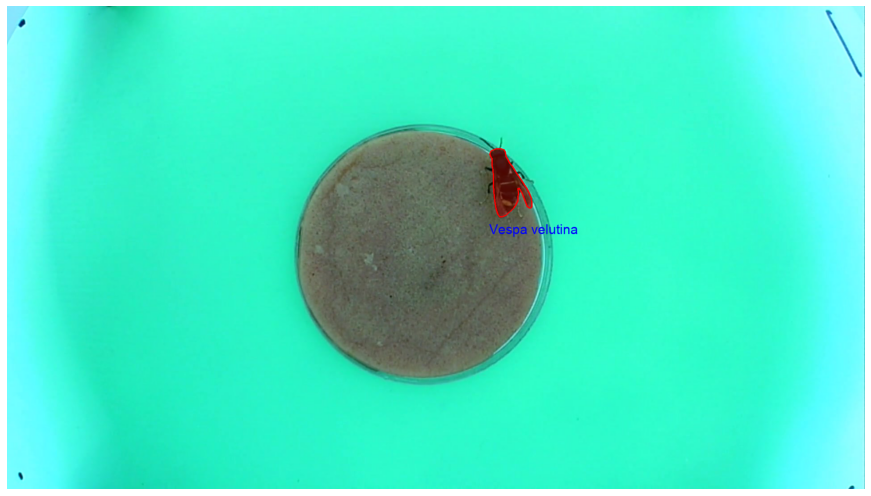

File name: /Users/Holmes/Research/Projects/vespai/datasets/data-21/labels/train/01FVFE2QBE5PKE7FAY99WN1AVR.txt
Vespa crabro (yellow) count:  0
Vespa velutina (red) count:  1


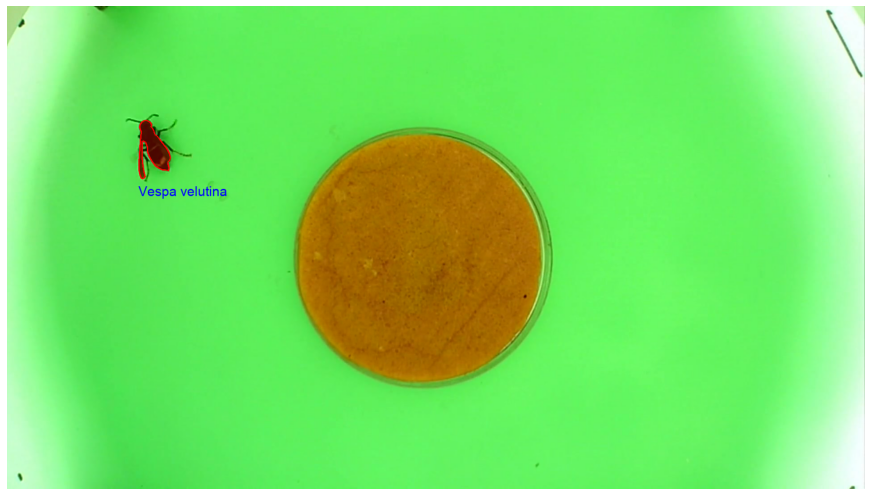

File name: /Users/Holmes/Research/Projects/vespai/datasets/data-21/labels/train/01FV7WT88DZ4QHAP10MV4AZ4S6.txt
Vespa crabro (yellow) count:  0
Vespa velutina (red) count:  1


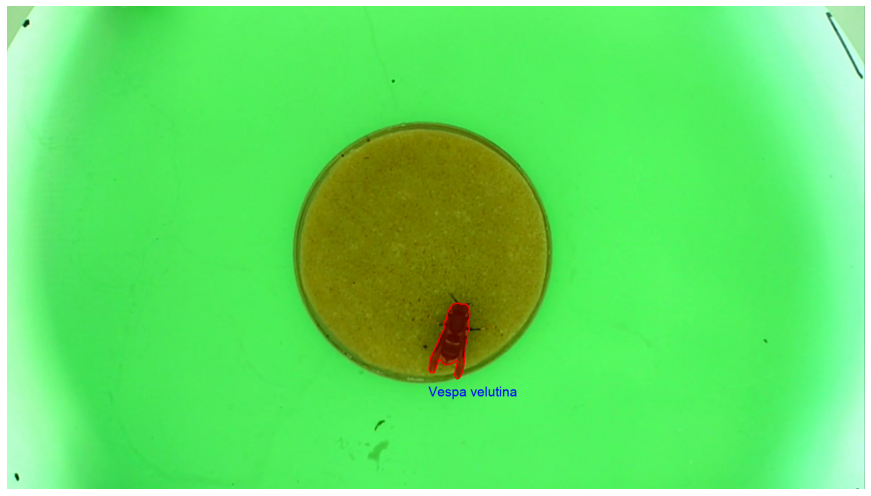

File name: /Users/Holmes/Research/Projects/vespai/datasets/data-21/labels/train/01FVJ6DCY07QWKFTEHFAZMVPDN.txt
Vespa crabro (yellow) count:  1
Vespa velutina (red) count:  0


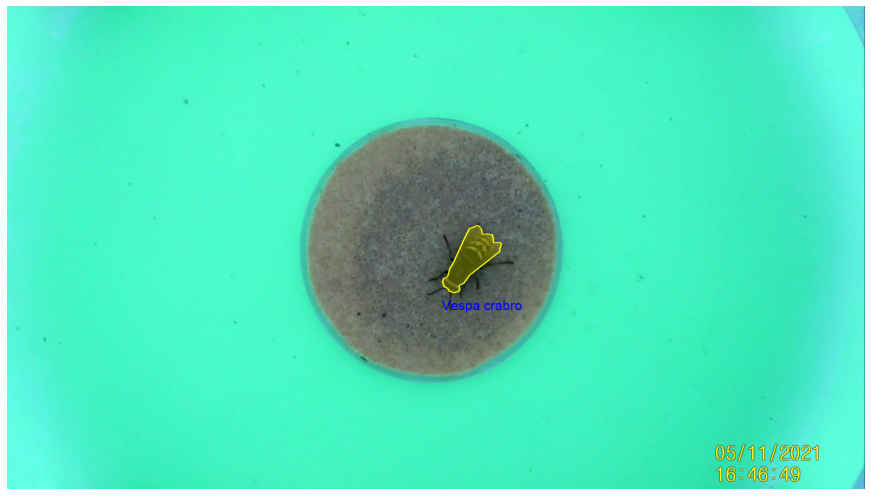

File name: /Users/Holmes/Research/Projects/vespai/datasets/data-21/labels/train/01FVAGPREJZW60P26VCJEWX3ZZ.txt
Vespa crabro (yellow) count:  0
Vespa velutina (red) count:  1


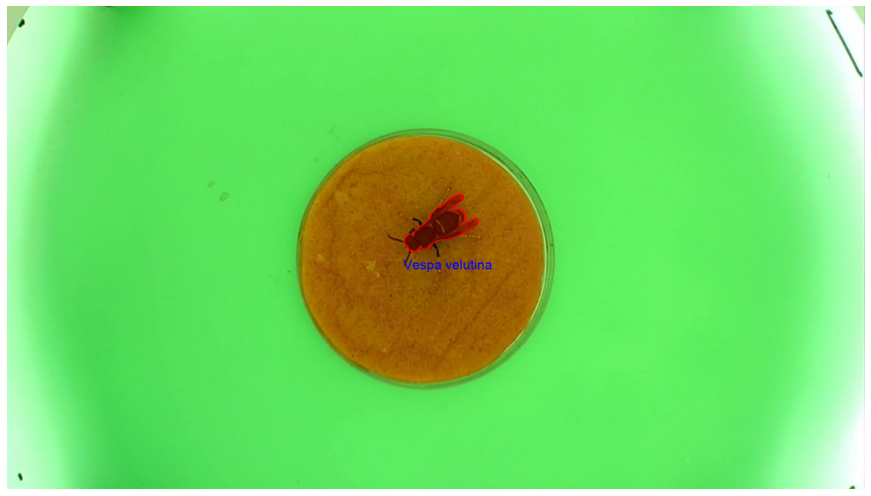

File name: /Users/Holmes/Research/Projects/vespai/datasets/data-21/labels/train/01FTZZPY8D4EPQMK5E1NEP583K.txt
Vespa crabro (yellow) count:  0
Vespa velutina (red) count:  1


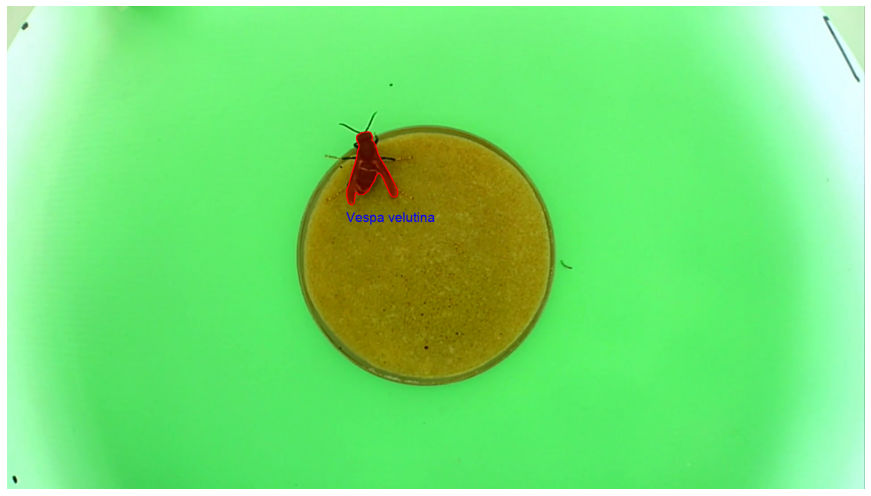

File name: /Users/Holmes/Research/Projects/vespai/datasets/data-21/labels/train/01FWE0V0ARQAZGS13YFBEYNM90.txt
Vespa crabro (yellow) count:  0
Vespa velutina (red) count:  1


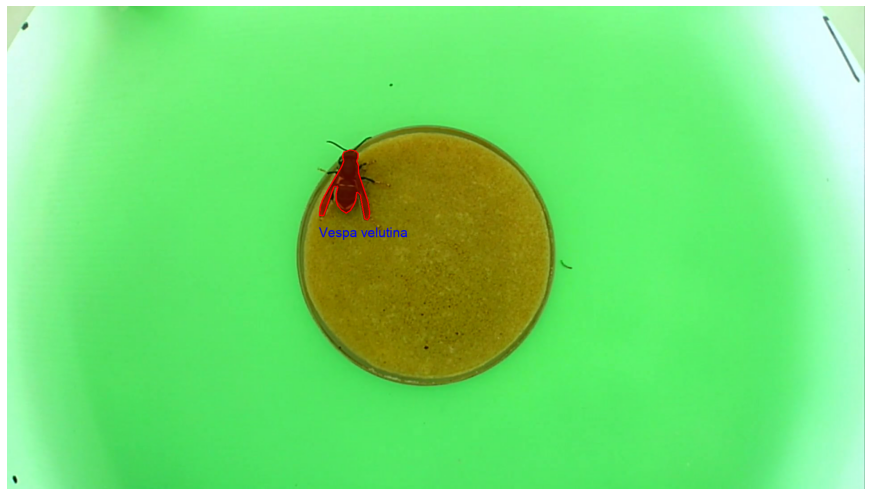

In [6]:
import glob
import random
from formatting.polygons import check_polys
%matplotlib inline

annotation_files = glob.glob(os.path.join(data_dir, 'labels/train/*.txt'))

# Randomly choose annotation files to overlay onto images
random.seed(0)
selection = random.choices(annotation_files, k=10)


# `plot_bounding_boxes` uses PIL.ImageDraw: if problem, set `print_labels=False`.
os.makedirs(os.path.join(data_dir, 'examples'), exist_ok=True)
for file in selection:
    print('File name:', file)
    fig, file_name = check_polys(file, print_labels=True)
    fig.savefig(os.path.join(
            data_dir, 'examples', 'labelled-' + os.path.basename(file_name)
        ))
